In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [5]:
d=pd.read_csv("Mall_Customers.csv")
d

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
d.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
d.tail()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
d.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [10]:
d.isnull()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [11]:
d.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [12]:
d.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
d['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


In [14]:
d['Annual_Income_(k$)'].sum()

np.int64(12112)

In [15]:
d.shape

(200, 5)

In [16]:
label_encoder = LabelEncoder()
d['Genre'] = label_encoder.fit_transform(d['Genre'])

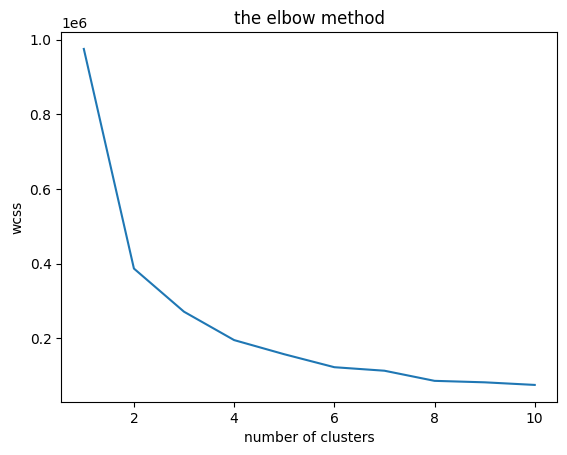

In [17]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(d)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
d['cluster'] = kmeans.fit_predict(d)

In [19]:
kmeans.inertia_

157505.7207247758

In [20]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 4, 4, 4, 4, 2, 2, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [21]:
k=pd.DataFrame(d)
k

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


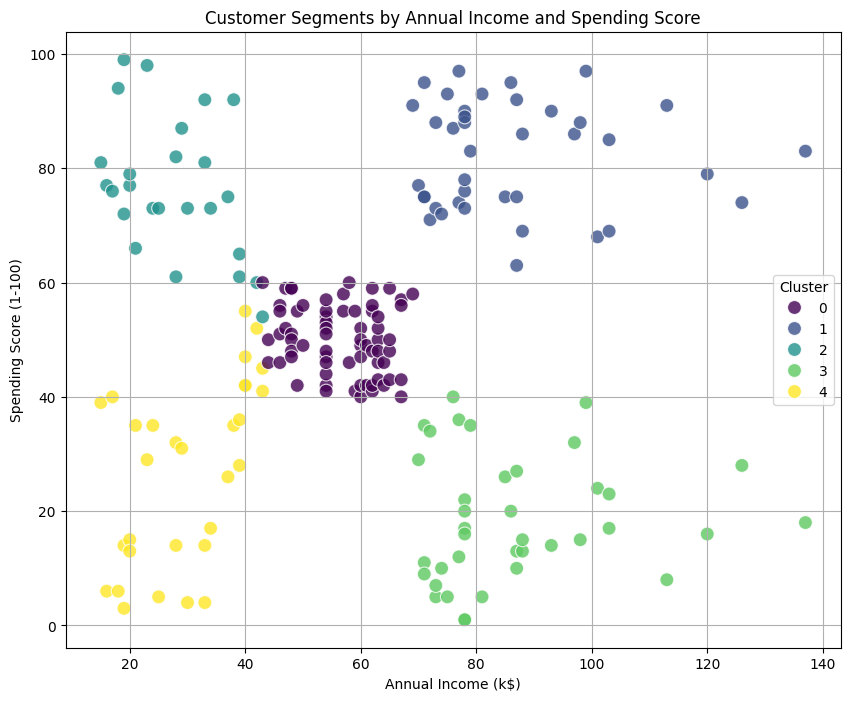

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='cluster', data=d, palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()